<a href="https://colab.research.google.com/github/cmarqueztecnosylva/3MAIR_Algoritmos_Oprimizacion_shared/blob/main/reinas_backtrackingV2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


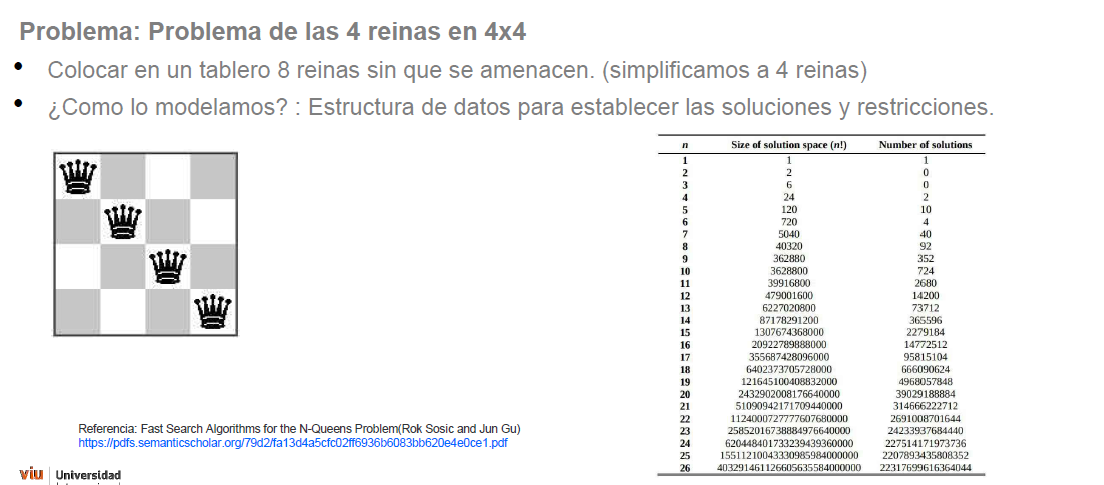




**Posicionamiento de n reinas por backtracking utilizando un diccionario como estructura contenedora del grafo.**

Esta solución, no esta completa, ya que funciona bien para n = 4 y n = 6, pero para n > 6 tengo que verificar las restricciones que utilizo para la poda, ya que analizando la solución, veo que la poda se realiza antes de tiempo evitando la creación de el siguiente nivel de ramas. Aún no he tenido tiempo de analizar este fallo.

Como observación más destacable, he constatado que para n = 4, la restricción |x1 - y1| = |x2 - y2| da dos errores, al evitar utilizar la columna indicada para posicionar la nueva reina. Aún no he podido analizar si este se debe a un fallo en el algoritmo, o porque n=4 implica esta posibilidad. 

Podeis activar la depuración poniendo a True la variable debug_me


	 


In [ ]:
################################################
# Amenaza a la reina por backtracking
# En amplitud...
################################################

import copy
import numpy as np

################################################
# Método que nos devuleve la posición de una reina
# the_vector: el vector donde buscar
# queen_2_find: un entero que indica que reina se está buscando
################################################
def get_queen_possition(the_vector, queen_2_find):
  v_n = len(the_vector)
  for local_i in range(0, v_n):
    if the_vector[local_i] == queen_2_find:
      return local_i

################################################
# Metodo que devuelve un vector de tamaño n
# con los posibles lugares donde situal la nueva
# reina, teniendo en cuenta las columnas y 
# otra posible reina en la digonal
# Poda nivel2: Importante ayuda en la Poda de ramas
################################################
def new_queen_possibilities(the_vector, queen_2_insert, the_size):
  free_pos = [True for i in range(the_size)] 

  for local_i in range(0, the_size):
    #Si en la misma columna
    if the_vector[local_i] != 0:
      free_pos[local_i] = False
    else:
      #En el caso de que a la der o izq haya una reina en 
      #la fila anterior, la posicion tampoco es valida
      if local_i < the_size - 1 and the_vector[local_i + 1] == (queen_2_insert - 1):
        free_pos[local_i] = False
      elif local_i > 0 and the_vector[local_i - 1] == (queen_2_insert - 1):
        free_pos[local_i] = False

  return free_pos

################################################
# Cuerpo principal del programa
################################################  
#init
debug_me = False
n = 6
my_graph = { }
vect = np.zeros(n, dtype=int)

my_graph['L_0_0'] = vect
#print(my_graph)

##Nivel del grafo
for grph_level in range(1,n+1):

  ## col nos indica sobre que vector estoy trabajando, y en
  ## este caso tambien, sobre que rama del grafo estoy trabajando
  for col in range(0,n):
    #TODO las reglas para poner la reina
    if grph_level < 2:
      ## Key del nuevo vector, para añadirlo al grafo
      graph_key = 'L_' + str(grph_level)+ '_' + str(col)
      my_graph[graph_key] = np.zeros(n, dtype=int)
      my_graph[graph_key][col] = grph_level
    else: #desde nivel 2, a comparar
      ## Mi fila actual a tratar siempre 
      ## es el nivel del grafo -1, y grph_level
      ## es tambien el numero de reina actual
      r = grph_level - 1

      for c in range(0,n):
        #Seleccionamos el nodo anterior para coger su vector
        graph_key_2_load = 'L_' + str(grph_level - 1)+ '_' + str(col)

        #Poda nivel1: si la clave de la rama anterior no 
        #existe, no continuamos por esta rama
        if graph_key_2_load not in my_graph:
          break;

        ## Pillamos el vector anterior de esta rama
        ## para evaluar sus posible plazas libres en curr_free_pos
        prev_vec = my_graph[graph_key_2_load]
        curr_free_pos = new_queen_possibilities(prev_vec, grph_level, n)
        prev_col = get_queen_possition(prev_vec, grph_level - 1)

        #fila anterior
        prev_row = r - 1

        #nueva reina en la diagonal?
        into_the_diagonal = abs(r - c) == abs(prev_row - prev_col)
		
        #Corregimos el fallo de la v1, por el cual nos dice que una reina
        #está en la diagonal, sin estarlo realmente, evitando meter la nueva
        #reina donde debería
        if n < 6:
          if into_the_diagonal == True and c == 0:
            into_the_diagonal = abs(prev_vec[c+1] - (grph_level - 1)) == 0
          elif into_the_diagonal == True and c == n-1:
            into_the_diagonal = abs(prev_vec[c-1] - (grph_level - 1)) == 0

        if debug_me == True:
          print('DEBUG: curr_free_pos: ',curr_free_pos, ' col: ',c, ' is ', str(curr_free_pos[c])  )
          print('DEBUG: grph_level: ',grph_level,' - col:',col)
          print('DEBUG: prev_row: ', prev_row, ' - prev_col', prev_col,' - abs(prev_row - prev_col)',abs(prev_row - prev_col))
          print('DEBUG: current_row r:',r,' - current_col c:',c,' - abs(r - c)', abs(r - c))
          print('DEBUG: into_the_diagonal:',into_the_diagonal)
        
        ## Decidimos si se añade la reina
        ## Poda nivel3: 
        if col != c and curr_free_pos[c] == True and into_the_diagonal == False:
          ## Ramificamos
          ## Copiamos el vector anterior para trabajar sobre el
          ## como vector nuevo
          current_vec = copy.copy(prev_vec)

          ## Key del nuevo vector, para añadirlo al grafo
          graph_key = 'L_' + str(grph_level)+ '_' + str(col)
          current_vec[c] = grph_level #es el num que representa a la reina
          my_graph[graph_key] = current_vec

          if debug_me == True:
            print('DEBUG: prev_vec - ',graph_key_2_load,': ', prev_vec)
            print('DEBUG: v - ',graph_key,': ', my_graph[graph_key])
            print(' ')

          ## Tras poner la reina, el vector esta
          ## completo en este nivel, y nos vamos
          break 
        #endif
      #endfor
    #endif
  #endfor
#endfor

#print(my_graph)

#Presentación del Grafo con las soluciones, no forma
#parte del algoritmo
tabs = ''
current_level = 0
for key in my_graph:
  #print(key, '->', my_graph[key])

  #por el nombre de la key, vamos a 
  #identificar el nivel y la rama
  ind1 = key.index('_')
  ind2 = key.rfind('_')
  level = int(key[ind1+1:ind2])
  branch = int(key[ind2+1:])

  #se usan los tabuladores para dar la 
  #impresion de un grafo al pintar los
  #items del diccionario
  if level == 0:
    tabs = "\t" * int(n / 2)
  else:
    tabs = ''

  if level > current_level:
    print('')
    current_level = current_level + 1
    if branch > 0:
      tabs = "\t" * branch
    
  print(tabs, my_graph[key], end = '')
  

			 [0 0 0 0 0 0]
 [1 0 0 0 0 0] [0 1 0 0 0 0] [0 0 1 0 0 0] [0 0 0 1 0 0] [0 0 0 0 1 0] [0 0 0 0 0 1]
 [1 0 2 0 0 0] [0 1 0 2 0 0] [2 0 1 0 0 0] [2 0 0 1 0 0] [2 0 0 0 1 0] [2 0 0 0 0 1]
 [1 0 2 0 3 0] [0 1 0 2 0 3] [2 0 1 0 3 0] [2 0 3 1 0 0] [2 0 3 0 1 0] [2 0 3 0 0 1]
	 [0 1 4 2 0 3] [2 0 3 1 4 0] [2 0 3 0 1 4] [2 0 3 0 4 1]
	 [5 1 4 2 0 3] [2 5 3 1 4 0] [2 5 3 0 1 4] [2 5 3 0 4 1]
	 [5 1 4 2 6 3] [2 5 3 1 4 6] [2 5 3 6 1 4] [2 5 3 6 4 1]